In [19]:
import pandas as pd
import IGtools as igt
import networkx as nx
import os, sys 
import matplotlib.pyplot as plt
import pandas as pd
from mis_utils import * 
from tqdm.notebook import tqdm

In [2]:
import igraph as ig

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
num_iter = 10;
N = 100;
k_min = 1
k_max = 25
ps = range(k_min,k_max);

In [5]:
# from scipy.optimize import fsolve, fmin, root

# def attempt_scipy_func(x, d,sigma, c):
# #     return np.abs(x - np.power(1 - ((sigma*sigma*np.log(x)+d)/float(x*d)) * np.exp((d*np.log(x) + 0.5*sigma*sigma*np.power(np.log(x),2))), c-1));
#     return np.abs(x - np.power(1 - ((sigma*sigma*np.log(x)+d)/float(d*x)) * np.exp((d*np.log(x) + 0.5*sigma*sigma*np.power(np.log(x),2))), c-1));

# def minimize_gauss_pstar(xs, d, sigma, c):
#     vals = map(lambda x: attempt_scipy_func(x, d, sigma, c), xs);
#     x0 = (np.min(vals), xs[np.nanargmin(vals)])
#     return x0[1]

# def rho_gauss(x,d,sigma,c):
#     ed01dp0 = (1 - d - sigma*sigma*np.log(x)) * np.exp(d*np.log(x) + 0.5*sigma*sigma*np.log(x)*np.log(x))
#     return (d/c)  * (1 - np.power(x,c/float(c-1))) + (ed01dp0);

# def gaussian_prediction(ps,sigmas,xs=None,c=2):
# #    if xs == None:
# #        xs = np.linspace(0,1,1000);
#     import time 
#     now = time.time()
#     rho_stars_gauss = []
#     for i,d in enumerate(ps):
#         p_stars_gauss = minimize_gauss_pstar(xs, d , sigmas[i], c);
#         rho_stars_gauss.append(rho_gauss(p_stars_gauss, d , sigmas[i], c));
#     return rho_stars_gauss;

In [6]:
N = 100
k_min = 1
k_max = 50
pmin = k_min/float(N);
pmax = k_max/float(N);
psp = range(k_min,k_max,1);

In [7]:
# import sympy as sy
# def p_star(d,c):
#     x = sy.Symbol('x')
#     return sy.solve(x - sy.Pow((1-sy.exp(d*(x-1))), c-1), x)

# def rho(d,c,p_star):
#     return (d/float(c)) * (1-np.power(float(p_star),(c/float(c-1)))) + (1-float(p_star)*d)*np.exp(d*(float(p_star)-1));

x_p = range(0,11);
p_stars = []
for l in x_p:
    p_stars.append(sy.N(p_star(l,2)[0]));

rhos = []
for i,s in enumerate(x_p):
    rhos.append( rho(s,2,p_stars[i]) )

/Users/lordgrilo/Dropbox (ISI Foundation)/development/neural_networks/rebuttal_code/mis_utils.py:7: RuntimeWarning: divide by zero encountered in log
  x = sy.Symbol('x');
/Users/lordgrilo/Dropbox (ISI Foundation)/development/neural_networks/rebuttal_code/mis_utils.py:7: RuntimeWarning: invalid value encountered in double_scalars
  x = sy.Symbol('x');
/Users/lordgrilo/Dropbox (ISI Foundation)/development/neural_networks/rebuttal_code/mis_utils.py:7: RuntimeWarning: divide by zero encountered in log
  x = sy.Symbol('x');
/Users/lordgrilo/Dropbox (ISI Foundation)/development/neural_networks/rebuttal_code/mis_utils.py:7: RuntimeWarning: invalid value encountered in double_scalars
  x = sy.Symbol('x');
/Users/lordgrilo/Dropbox (ISI Foundation)/development/neural_networks/rebuttal_code/mis_utils.py:7: RuntimeWarning: divide by zero encountered in log
  x = sy.Symbol('x');
/Users/lordgrilo/Dropbox (ISI Foundation)/development/neural_networks/rebuttal_code/mis_utils.py:7: RuntimeWarning: inva

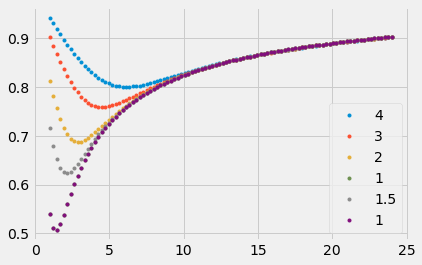

In [9]:
c = 2
pss = np.linspace(ps[0],ps[-1],100)
xs = np.linspace(0,1,5000);
for sigma in [4, 3, 2, 1, 1.5, 1]:
    plt.plot(pss, 
             list(map(lambda x: minimize_gauss_pstar(xs, x, sigma,c), pss)),'.',
             label = sigma)
# plt.plot(pss, map(lambda x: minimize_gauss_pstar(xs, x, 3,c), pss),'.', label = '3')
# plt.plot(pss, map(lambda x: minimize_gauss_pstar(xs, x, 2,c), pss),'.', label = '2')
# plt.plot(pss, map(lambda x: minimize_gauss_pstar(xs, x, 1.5,c), pss),'.', label = '1.5')
# plt.plot(pss, map(lambda x: minimize_gauss_pstar(xs, x, 1,c), pss),'.', label = '1')
plt.legend(loc=0)

In [10]:
# define the colormap
cmap = plt.cm.hot
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

In [11]:
x_p = range(k_min,k_max,1);
p_stars = []
for l in x_p:
    p_stars.append(sy.N(p_star(l,2)[0]));

rhos = []
for i,s in enumerate(x_p):
    rhos.append( rho(s,2,p_stars[i]) )

/Users/lordgrilo/Dropbox (ISI Foundation)/development/neural_networks/rebuttal_code/mis_utils.py:7: RuntimeWarning: divide by zero encountered in log
  x = sy.Symbol('x');
/Users/lordgrilo/Dropbox (ISI Foundation)/development/neural_networks/rebuttal_code/mis_utils.py:7: RuntimeWarning: invalid value encountered in double_scalars
  x = sy.Symbol('x');
/Users/lordgrilo/Dropbox (ISI Foundation)/development/neural_networks/rebuttal_code/mis_utils.py:7: RuntimeWarning: divide by zero encountered in log
  x = sy.Symbol('x');
/Users/lordgrilo/Dropbox (ISI Foundation)/development/neural_networks/rebuttal_code/mis_utils.py:7: RuntimeWarning: invalid value encountered in double_scalars
  x = sy.Symbol('x');
/Users/lordgrilo/Dropbox (ISI Foundation)/development/neural_networks/rebuttal_code/mis_utils.py:7: RuntimeWarning: divide by zero encountered in log
  x = sy.Symbol('x');
/Users/lordgrilo/Dropbox (ISI Foundation)/development/neural_networks/rebuttal_code/mis_utils.py:7: RuntimeWarning: inva

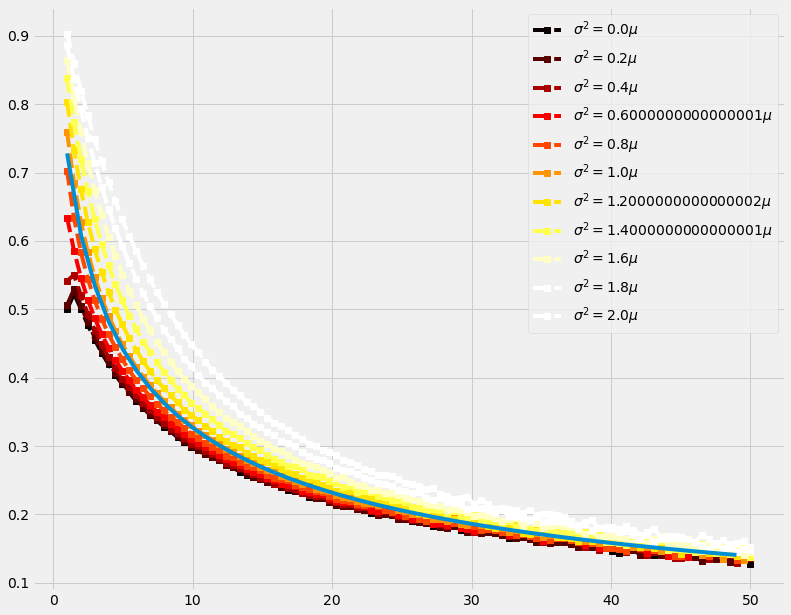

In [14]:
n_sigmas = np.linspace(0,2,11)
sigmas = {}
pss = np.linspace(k_min,k_max,100)
fig = plt.figure(figsize=(12,10))
for ii,n_sigma in enumerate(n_sigmas):
    sigmas = list(map(lambda x: n_sigma*np.sqrt(x), pss));
    plt.plot(pss, gaussian_prediction(pss, sigmas,xs=np.linspace(0,1,10000)),'--s',color=cmap(ii*30), label=r'$\sigma^2 =$'+str(n_sigma)+r'$\mu$')
plt.legend(loc=0)

x_p = range(k_min,k_max,1);
p_stars = []
for l in x_p:
    p_stars.append(sy.N(p_star(l,2)[0]));

rhos = []
for i,s in enumerate(x_p):
    rhos.append( rho(s,2,p_stars[i]) )
plt.plot(x_p,rhos,'-')


# Comparison with simulations

In [25]:
n_sigmas_redux = [ 0. ,  0.4, 0.8,  1. ,  1.2,  1.6 ]

In [26]:
num_iter = 20;
N = 50;

res_ig = {};
res_ig_fg = {}
res_ig_fg_v1 = {}
res_ig_fg_v2 = {}
res_ig_fg_clique = {}
res_leaf_branch = {}
res_leaf_core = {}
av_k_ig = {}
n_ig_dict = {}
import time
from datetime import datetime

import igraph as igg

from scipy.stats import norm
xs = np.linspace(0,1,10000)

for n_sigma in tqdm(n_sigmas_redux):
    res_ig[n_sigma] = {};
    av_k_ig[n_sigma] = {};
    n_ig_dict[n_sigma] = {};

    for p in tqdm(pss):

        res_ig[n_sigma][p] = []
        av_k_ig[n_sigma][p] = [];
        n_ig_dict[n_sigma][p] = []
        for it in range(num_iter):
            deg = list(map(lambda x: np.max([0, int(x)]), norm.rvs(p,n_sigma*np.sqrt(p),N)));
            if not np.sum(deg)%2==0:
                deg[0]+=1;
            g = nx.configuration_model(deg)
            av_k_ig[n_sigma][p].append(np.mean(list(dict(g.degree()).values())));
            n_g = g.number_of_nodes()
            n_ig_dict[n_sigma][p].append(n_g);
            nx.write_gml(g,'test.gml');
            g_igraph = igg.load('test.gml')
            res_ig[n_sigma][p].append( g_igraph.alpha() / float(n_g) )  


In [34]:
#plt.style.use('seaborn-white')
# define the colormap
cmap = plt.cm.hot
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in list(range(cmap.N))]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

## Production of Figure S.8 in SI

/Users/lordgrilo/Dropbox (ISI Foundation)/development/neural_networks/rebuttal_code/mis_utils.py:7: RuntimeWarning: divide by zero encountered in log
  x = sy.Symbol('x');
/Users/lordgrilo/Dropbox (ISI Foundation)/development/neural_networks/rebuttal_code/mis_utils.py:7: RuntimeWarning: invalid value encountered in double_scalars
  x = sy.Symbol('x');
/Users/lordgrilo/Dropbox (ISI Foundation)/development/neural_networks/rebuttal_code/mis_utils.py:7: RuntimeWarning: divide by zero encountered in log
  x = sy.Symbol('x');
/Users/lordgrilo/Dropbox (ISI Foundation)/development/neural_networks/rebuttal_code/mis_utils.py:7: RuntimeWarning: invalid value encountered in double_scalars
  x = sy.Symbol('x');
/Users/lordgrilo/Dropbox (ISI Foundation)/development/neural_networks/rebuttal_code/mis_utils.py:7: RuntimeWarning: divide by zero encountered in log
  x = sy.Symbol('x');
/Users/lordgrilo/Dropbox (ISI Foundation)/development/neural_networks/rebuttal_code/mis_utils.py:7: RuntimeWarning: inva

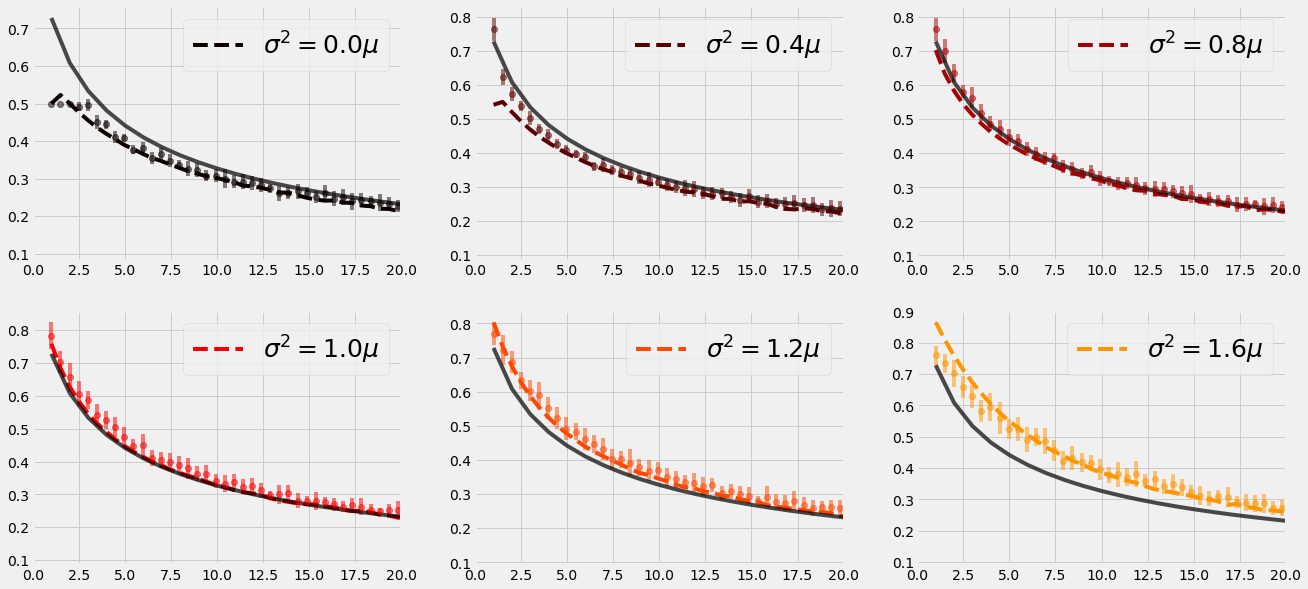

In [48]:
n_sigmas = np.linspace(0, 2, 11)  # range(1,5);
sigmas = {}
pss = np.linspace(k_min, k_max, 100)
fig = plt.figure(figsize=(20, 20))
preds_df = pd.DataFrame()
for i, n_sigma in enumerate(sorted(res_ig.keys())):
    plt.subplot(4, 3, i+1)
    data = res_ig[n_sigma]
    yy = list(map(lambda x: np.mean(data[x]), sorted(data.keys())))
    std_yy = list(map(lambda x: np.std(data[x]), sorted(data.keys())))
    plt.errorbar(pss, yy, std_yy, fmt='o', color=cmaplist[int(
        i*150/len(sorted(res_ig.keys())[1::]))], alpha=0.5)
    sigmas = list(map(lambda x: n_sigma*np.sqrt(x), pss))
    y = gaussian_prediction(pss, sigmas, xs=np.linspace(0, 1, 5000))
    plt.plot(pss, y, '--k', label=r'$\sigma^2 =$'+str(n_sigma)+r'$\mu$',
             color=cmaplist[int(i*150/len(sorted(res_ig.keys())[1::]))])
    preds_df[n_sigma] = pd.Series(y, pss)
    plt.legend(loc=0, fontsize=25)

#    x_p = range(k_min,k_max,1);
    plt.plot(x_p, rhos, '-k', alpha=0.7)
    plt.xlim(0, 20)
# plt.savefig('../../submission/si/plots/heterogeneity_role.pdf',dpi=600)

# Production of Figure 2b in main text

In [59]:
n_sigmas_redux = sorted(list(res_ig.keys())[1::])
preds = {}
for i, n_sigma in enumerate(n_sigmas_redux):
    sigmas = list(map(lambda x: n_sigma*np.sqrt(x), pss));
    preds[n_sigma] = gaussian_prediction(pss, sigmas,xs=np.linspace(0,1,5000));

/Users/lordgrilo/Dropbox (ISI Foundation)/development/neural_networks/rebuttal_code/mis_utils.py:7: RuntimeWarning: divide by zero encountered in log
  x = sy.Symbol('x');
/Users/lordgrilo/Dropbox (ISI Foundation)/development/neural_networks/rebuttal_code/mis_utils.py:7: RuntimeWarning: invalid value encountered in double_scalars
  x = sy.Symbol('x');
/Users/lordgrilo/Dropbox (ISI Foundation)/development/neural_networks/rebuttal_code/mis_utils.py:7: RuntimeWarning: overflow encountered in double_scalars
  x = sy.Symbol('x');
/Users/lordgrilo/Dropbox (ISI Foundation)/development/neural_networks/rebuttal_code/mis_utils.py:7: RuntimeWarning: overflow encountered in exp
  x = sy.Symbol('x');


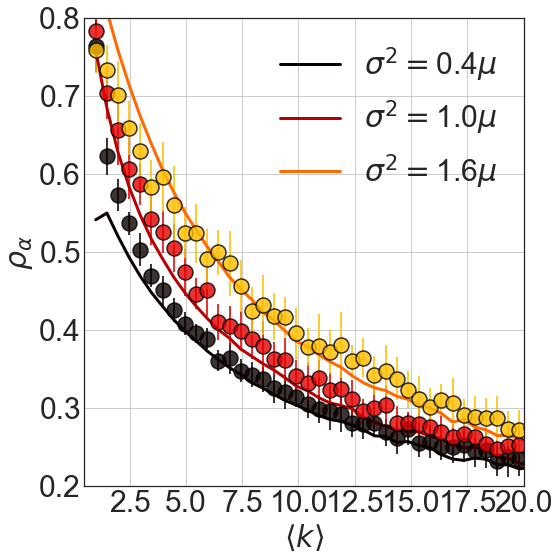

In [63]:
fig2b = {}

plt.style.use('seaborn-white')
fs = 30
sigmas = {}
fig = plt.figure(figsize=(8,8))
for i, n_sigma in enumerate(sorted(res_ig.keys())[1::2]):
    sigmas = list(map(lambda x: n_sigma*np.sqrt(x), pss));
    data = res_ig[n_sigma]
    yy = list(map(lambda x: np.mean(data[x]), sorted(data.keys())));
    std_yy = list(map(lambda x: np.std(data[x]), sorted(data.keys())));
    plt.errorbar(pss,yy,std_yy, ms=30,alpha=0.8,
                 color=cmaplist[int(i*250/len(sorted(res_ig.keys())[1::2]))],fmt='.',lw=2,mew=1.5,mec='k')#,label = n_sigma)
    plt.plot(pss, preds[n_sigma],'-',
             color=cmaplist[int(i*200/len(sorted(res_ig.keys())[1::2]))],
             label=r'$\sigma^2 =$'+str(n_sigma)+r'$\mu$',lw=3)
    plt.legend(loc=0,fontsize=fs)
    fig2b[n_sigma] = {'pss':pss, 'simulation_alpha':yy,
                'std_simulation_alpha':std_yy, 'pred_alpha': preds[n_sigma]}
plt.xlim(0.5,20)
plt.ylim(0.2,.8)
plt.xlabel(r'$\langle k \rangle$', fontsize=fs)
plt.ylabel(r'$\rho_\alpha$', fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.box('off')
plt.grid('off')
plt.tight_layout()


In [64]:
import pickle as pk
pk.dump(fig2b, open('./figure_data/figure2b.pck', 'wb'))